### Link utili:
* [The Boston housing dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)
* [pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#dataframe)
* [seaborn: statistical data visualization](https://seaborn.pydata.org/)
    * [distribuzioni di probabilità](https://seaborn.pydata.org/tutorial/distributions.html)
* [Modello di regressione lineare con scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [Bias-variance decomposition - overview](http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/#overview)

# Compromesso distorsione-varianza

## Indice
1. [Analisi del Boston dataset](#boston)<br/>
2. [Dati di oggi e dati di domani](#oggi_domani)<br/>
    2.1 [Simulazione](#simulazione)<br/>
    2.2 [Decomposizione distorsione-varianza](#bias_var)<br/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
plt.style.use('seaborn-whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 1. Analisi del Boston dataset <a id=boston> </a>
**Data Set Characteristics:**  

- Number of Instances: 506 

- Number of Attributes: 13 numeric/categorical predictive.

- Attribute Information (in order):
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per \$10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    \% lower status of the population
- Target:
    - MEDV     Median value of owner-occupied homes in \$1000's

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

boston_dataset = load_boston()

In [3]:
# cosa contiene il dataset boston housing?
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print("Nomi delle covariate: \n", boston_dataset.feature_names)

Nomi delle covariate: 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
# Convertiamo i dati dal formato numpy.ndarray a pandas.DataFrame, più maneggevole
boston = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Aggiungiamo la colonna della variabile dipendente MEDV al pandas dataframe
boston['MEDV'] = boston_dataset.target

In [7]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


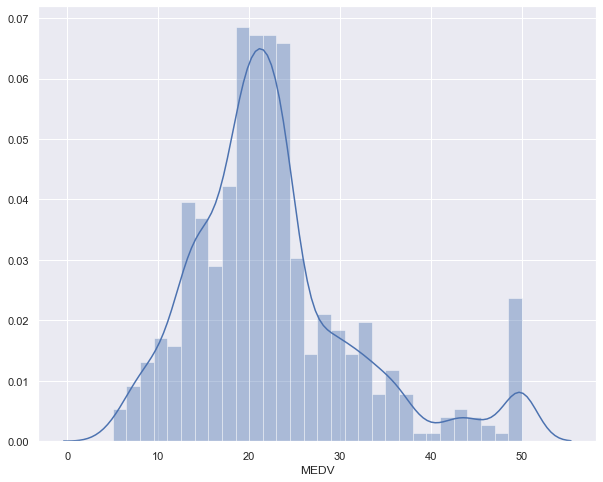

In [8]:
# osserviamo la distribuzione della variabile risposta MEDV
sns.set(rc={'figure.figsize': (10, 8)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

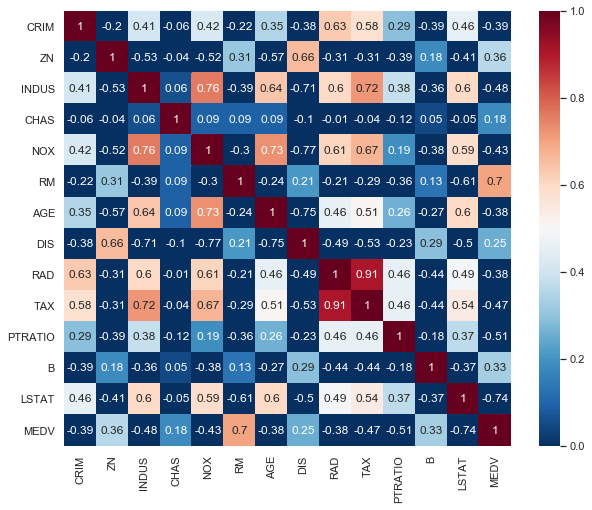

In [9]:
# heatmap / correlogramma
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap="RdBu_r", vmin=0, vmax=1)

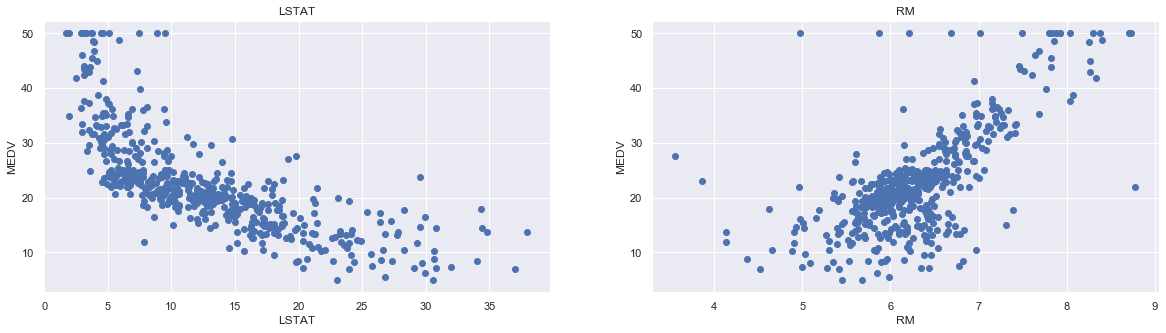

In [10]:
# Esplorazione grafica
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [11]:
# estraggo la variabile risposta dal dataset
y = boston['MEDV']
boston = boston.drop(['MEDV'], axis=1)

In [12]:
# aggiungo come regressori i logaritmi delle variabili già esistenti
# devo intercettare il caso x_ij=0
log_boston = boston.transform(lambda x: np.log(x+0.01))
# aggiungo "LOG_" al nome dei campi
cnames = log_boston.columns
cnames = ['LOG_' + nome for nome in cnames]
log_boston.columns = cnames

# aggiungo come regressori i quadrati delle variabili già esistenti
sq_boston = boston.transform(lambda x: x**2)
# aggiungo "X2_" al nome dei campi
cnames = sq_boston.columns
cnames = ['X2_' + nome for nome in cnames]
sq_boston.columns = cnames

# aggiungo come regressori i reciproci delle variabili già esistenti
rec_boston = boston.transform(lambda x: 1/(x+0.01))
# aggiungo "REC_" al nome dei campi
cnames = rec_boston.columns
cnames = ['REC_' + nome for nome in cnames]
rec_boston.columns = cnames


# pandas.concat concatena "orizzontalmente" due pandas.DataFrame usando gli indici di riga
boston_ext = pd.concat([boston, log_boston, sq_boston, rec_boston], axis=1)
print("Nuovi nomi di colonna:\n {}".format(boston_ext.columns))

# quanti regressori ho a disposizione?
n, p = boston_ext.shape
print("\nForma del dataset: {} x {}".format(n, p))

Nuovi nomi di colonna:
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'LOG_CRIM', 'LOG_ZN', 'LOG_INDUS', 'LOG_CHAS',
       'LOG_NOX', 'LOG_RM', 'LOG_AGE', 'LOG_DIS', 'LOG_RAD', 'LOG_TAX',
       'LOG_PTRATIO', 'LOG_B', 'LOG_LSTAT', 'X2_CRIM', 'X2_ZN', 'X2_INDUS',
       'X2_CHAS', 'X2_NOX', 'X2_RM', 'X2_AGE', 'X2_DIS', 'X2_RAD', 'X2_TAX',
       'X2_PTRATIO', 'X2_B', 'X2_LSTAT', 'REC_CRIM', 'REC_ZN', 'REC_INDUS',
       'REC_CHAS', 'REC_NOX', 'REC_RM', 'REC_AGE', 'REC_DIS', 'REC_RAD',
       'REC_TAX', 'REC_PTRATIO', 'REC_B', 'REC_LSTAT'],
      dtype='object')

Forma del dataset: 506 x 52


## 2. Dati di domani <a id=oggi_domani> </a>

### 2.1 Simulazione <a id="simulazione"></a>

Suddivido casualmente il dataset originale in training e testing set:
- la proporzione training/testing è del 75%/25%
- all'interno di un ciclo, costruisco un nuovo DataFrame con `n_var` colonne, `n_var=1, ..., p` (p=52):
    - applico la ripartizione casuale di training e testing set
    - calcolo l'errore quadratico medio/MSE su training (`train_mse`) e testing set (`test_mse`)

In [13]:
train_mse = np.empty(shape=(0,1), dtype=int)
test_mse = np.empty(shape=(0,1), dtype=int)

np.random.RandomState(seed=5)

# selezione casuale del training set 
train_indexes = np.random.choice(a=[False, True], size=n, p=[0.25, 0.75]) 

for n_var in np.arange(p):
    
    # training set
    X_train_ext = boston_ext.iloc[train_indexes, 0:(n_var+1)]
    y_train_ext = y[train_indexes]
    
    # stima del modello di regressione lineare
    lin_model = LinearRegression()
    lin_model.fit(X_train_ext,  y_train_ext)

    # calcolo MSE per dati "di oggi" / training set
    y_train_predict = lin_model.predict(X_train_ext)
    mse = mean_squared_error(y_train_ext, y_train_predict)
    train_mse = np.append(train_mse, [mse])

    # testing set
    X_test_ext = boston_ext.iloc[~train_indexes, 0:(n_var+1)]
    y_test_ext = y[~train_indexes]

    # calcolo MSE per dati "di domani" / testing set
    y_test_predict = lin_model.predict(X_test_ext)
    mse = mean_squared_error(y_test_ext, y_test_predict)
    test_mse = np.append(test_mse, [mse])    

In [14]:
#train_mse = np.reshape(train_mse, (1, p))
#test_mse = np.reshape(test_mse, (1, p))

print("Valori misurati di MSE sul training set: \n{}".format(train_mse))
print("\nValori misurati di MSE sul test set: \n{}".format(test_mse))

Valori misurati di MSE sul training set: 
[72.92508982 66.29219196 61.14604809 58.791485   58.79137181 29.74537372
 29.3162958  26.38479985 26.2664965  25.49310881 22.78906272 20.98545945
 18.78105491 18.35455138 18.33097646 17.42196182 17.42196182 17.40658634
 12.47622722 12.47599867 12.26884313 12.05937073 11.99562678 11.96252311
 11.95215474 11.13904583 10.8687241  10.74396819 10.55817337 10.55817337
 10.49275149 10.29737935 10.28579965 10.27602567 10.26544979  9.96456318
  9.96441973  9.91174451  9.91089999  9.90658892  9.89616605  9.8959812
  9.8959812   9.89598101  9.85639999  9.84695638  9.78294569  9.78090111
  9.71386941  9.71137295  9.6853704   9.53051173]

Valori misurati di MSE sul test set: 
[76.34375521 66.21361749 58.8828203  53.99054954 54.0302029  50.68807671
 51.47160246 46.24484955 46.0225872  45.56238753 43.00985461 44.12238975
 33.29023108 33.25457904 33.29482518 31.52564467 31.52564467 31.48461309
 27.9478479  27.97141592 26.70764404 26.50222479 26.29017468 26.221

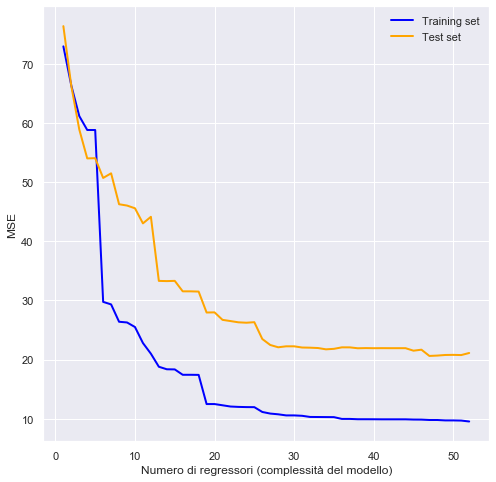

In [15]:
# Grafico MSE dati "di oggi" (training set) vs dati "di domani" (testing set)
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
x = np.arange(p)+1

plt.plot(x, train_mse.reshape(p,), color='blue', linewidth=2, alpha=1, label='Training set')
plt.plot(x, test_mse.reshape(p,), color='orange', linewidth=2, alpha=1, label='Test set')
plt.xlabel("Numero di regressori (complessità del modello)")
plt.legend()
plt.ylabel("MSE");

### 2.2 Decomposizione distorsione-varianza <a id="#bias_var"></a>

Per utilizzare un metodo automatico di stima della decomposizione distorsione-varianza, ho installato il pacchetto `mlxtend`. Prima di installarlo, ricordate di attivare l'ambiente virtuale `msbd`:

`conda activate msbd`

`conda install -c conda-forge mlxtend`

In [17]:
from mlxtend.data import boston_housing_data
from mlxtend.evaluate import bias_variance_decomp

print(help(bias_variance_decomp))

Help on function bias_variance_decomp in module mlxtend.evaluate.bias_variance_decomp:

bias_variance_decomp(estimator, X_train, y_train, X_test, y_test, loss='0-1_loss', num_rounds=200, random_seed=None)
    estimator : object
        A classifier or regressor object or class implementing a `fit`
        `predict` method similar to the scikit-learn API.
    
    X_train : array-like, shape=(num_examples, num_features)
        A training dataset for drawing the bootstrap samples to carry
        out the bias-variance decomposition.
    
    y_train : array-like, shape=(num_examples)
        Targets (class labels, continuous values in case of regression)
        associated with the `X_train` examples.
    
    X_test : array-like, shape=(num_examples, num_features)
        The test dataset for computing the average loss, bias,
        and variance.
    
    y_test : array-like, shape=(num_examples)
        Targets (class labels, continuous values in case of regression)
        associate

Confronteremo l'errore di stima (medio) in termini di MSE calcolato in due diverse situazioni:
- modello di regressione lineare stimato sul dataset _boston_
- modello di regressione lineare stimato sul dataset _boston "esteso"_

In [18]:
# Decomposizione distorsione-varianza calcolata sui regressori originali

# training set
X_train = boston.iloc[train_indexes, :]
y_train = y[train_indexes]
# testing set
X_test = boston.iloc[~train_indexes, :]
y_test = y[~train_indexes]

# stima del modello di regressione lineare
base_lin_model = LinearRegression()
base_lin_model.fit(X_train,  y_train)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        base_lin_model, X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy(), 
        loss='mse',
        random_seed=42)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 21.345
Average bias: 19.841
Average variance: 1.503


In [19]:
# Decomposizione distorsione-varianza calcolata sul dataset "esteso", utilizzando il modello lineare con tutti i regressori

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        lin_model, X_train_ext.to_numpy(), y_train_ext.to_numpy(), X_test_ext.to_numpy(), y_test_ext.to_numpy(), 
        loss='mse',
        random_seed=42)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 20.335
Average bias: 11.085
Average variance: 9.250


In [20]:
loss2 = np.empty(shape=(0,0), dtype=int)
bias2 = np.empty(shape=(0,0), dtype=int)
variance2 = np.empty(shape=(0,0), dtype=int)
np.random.RandomState(seed=42)

# selezione casuale del training set 
train_indexes2 = np.random.choice(a=[False, True], size=n, p=[0.25, 0.75]) 

for n_var in np.arange(p):
    
    # training set
    X_train2 = boston_ext.iloc[train_indexes2, 0:(n_var+1)]
    y_train2 = y[train_indexes2]
    
    # stima del modello di regressione lineare
    lin_model2 = LinearRegression()
    #lin_model2.fit(X_train2,  y_train2)

    # testing set
    X_test2 = boston_ext.iloc[~train_indexes2, 0:(n_var+1)]
    y_test2 = y[~train_indexes2]

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        lin_model2, X_train2.to_numpy(), y_train2.to_numpy(), X_test2.to_numpy(), y_test2.to_numpy(), 
        loss='mse'
    )
    loss2 = np.append(loss2, [avg_expected_loss])
    bias2 = np.append(bias2, [avg_bias])
    variance2 = np.append(variance2, [avg_var])
    

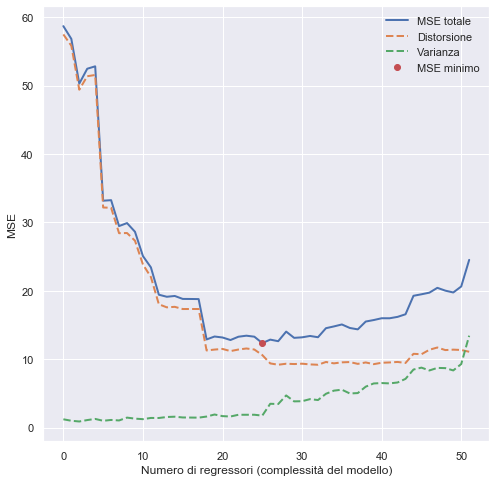

In [21]:
# Grafico di decomposizione distorsione/varianza per modelli lineari di complessità crescente
# Tutte le quantità sono misurate sui dati "di domani"
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
x = np.arange(p)

plt.plot(x, loss2.reshape(p,), linewidth=2, alpha=1, label='MSE totale')
plt.plot(x, bias2.reshape(p,), linewidth=2, alpha=1, linestyle='dashed', label='Distorsione')
plt.plot(x, variance2.reshape(p,), linewidth=2, alpha=1, linestyle='dashed',  label='Varianza')
plt.plot(np.where(loss2==np.min(loss2)), np.min(loss2), 'ro',label='MSE minimo');
plt.xlabel("Numero di regressori (complessità del modello)")
plt.legend()
plt.ylabel("MSE");